## LOGISTIC REGRESSION
Logistic Rgression as a method for Classification 

Three of the most widely-used classifiers: 
 - logistic regression
 - linear discriminant analysis
 - K-nearest neighbors 

Although we could use (non-linear) least squares to fit the model, the more general method of maximum likelihood is preferred, since it has better statistical properties.

A **Confusion Matrix** is used to evaluate a classification problem

### BASIC TERMINOLOGY:

TRUE POSITIVES (TP)-----FALSE POSITIVES (FP)

FALSE NEGATIVES (FN)----TRUE NEGATIVES (TN)

 - FALSE POSITIVES (FP) = TYPE 1 ERROR
 - FALSE NEGATIVES (FN) = TYPE 2 ERROR
 
### MEASURES OF EVALUATION OF THE CLASSIFIER 

 - **ACCURACY** = $(TP + TN) / TOTAL$  ,i.e. overall how many times is it correct 
 - **MISCLASSIFICATION RATE (ERROR RATE)** = $(FP + FN) / TOTAL$  ,i.e. overall how many times is wrong 
 
### Here we begin to explore an example of logistic regression using the famous Titanic data set (taken from Kaggle.com competitions) to attempt to predict whether or not a passenger survived based off of their features

### Problem Statement : Predict the status of a passenger, i.e. survived or deceased.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Train Set
import io
import requests
url1 = 'https://raw.githubusercontent.com/agrija9/Udemy-Python-for-Data-Science-and-Machine-Learning-Bootcamp/master/Secton%2017.%20Logistic%20Regression/titanic_train.csv'
read_data1 = requests.get(url1).content
train = pd.read_csv(io.StringIO(read_data1.decode('utf-8')))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [3]:
# Test Set
url2 = 'https://raw.githubusercontent.com/tpcarneiro/Python-Data-Science-and-Machine-Learning-Bootcamp/master/Machine%20Learning%20Sections/Logistic-Regression/titanic_test.csv'
read_data2 = requests.get(url2).content
test = pd.read_csv(io.StringIO(read_data2.decode('utf-8')))
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test.shape

(418, 11)

The method we follow here is 
1. Train the Logistic Regression model on train data
2. Evaluate through cross validation 
3. Check results and then make predictions for the tests data 

#### DATA SET ATTRIBUTE DESCRIPTION:
 - PassengerId  :  Passsenger Id (Unique)
 - Survived 
    - 0  = Deceased
    - 1  = Survived
 - Pclass  :       Passenger class (1, 2, or 3)
 - Name 
 - Sex
 - Age
 - SibSp  :        No. of Siblings or Spouses aboard  
 - Parch  :        No. of Parents or Children aboard
 - Ticket  :       Ticket No.
 - Fare  :         Price paid for that ticket
 - Cabin  :        Cabin No. (if known)
 - Embarked  :     The Port embarking on the Ticket
    - C  : Cherbourg
    - Q  : Queenstown
    - S  : Southampton
    
### EDA

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Total number of 'passengers' aboard were 1,317  (with crew the no. was 2,222), however here we have information about only
# 1,309 ppassengers
total = len(train) + len(test)
total

1309

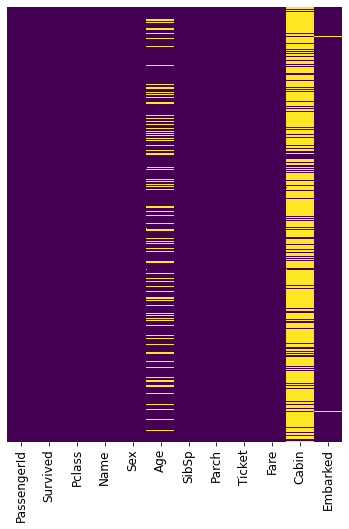

In [10]:
# MISSING DATA FROM SEABORN HEATMAP
fig = plt.figure(figsize=(6,8))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
train.isnull().sum() / len(train) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
test.isnull().sum() / len(test) * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

## DATA CLEANING

#### There are several ways of dealing with missing Age data:
 - Impute the missing data with the mean of the ages of Passengers on board
 - Prepare a model to predict ages using all the other features
 - What we do here is that, we compute the median passenger Age based off of passenger class

In [4]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

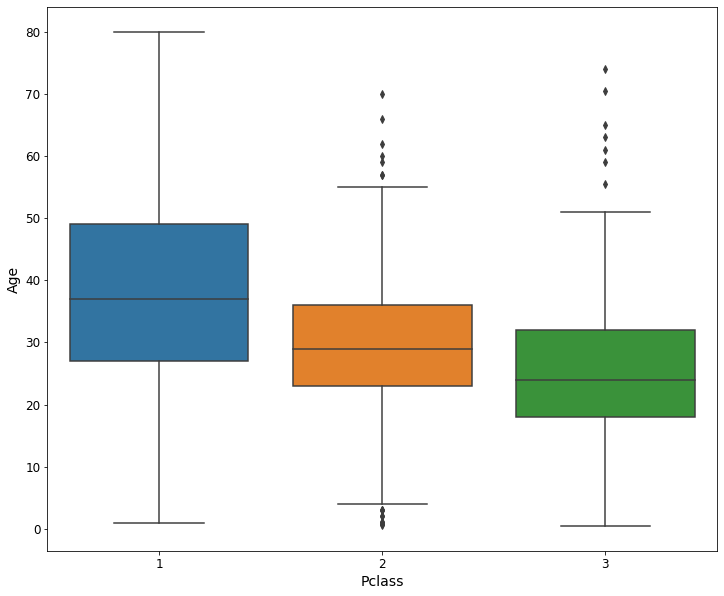

In [16]:
# The distribution of ages in each Passenger Class
fig = plt.figure(figsize=(12,10))
sns.boxplot(x='Pclass', y='Age', data=train);

The Median age for of the 1st Class Passengers is greater than that of 2nd class, which in turn is greater than that of the passengers from the 3rd class

In [17]:
sns.set_style('whitegrid')

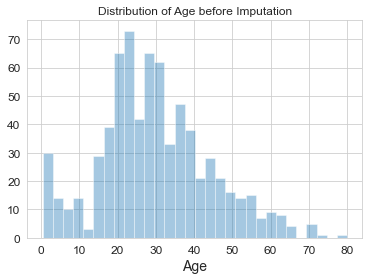

In [18]:
# Distribution of Age 
sns.distplot(train['Age'], kde=False, bins=30)
plt.title('Distribution of Age before Imputation');

In [19]:
for Pcl in [1, 2, 3]:
    print(Pcl, 'st Class', train[train['Pclass'] == Pcl]['Age'].median())

1 st Class 37.0
2 st Class 29.0
3 st Class 24.0


In [20]:
for Pcl in [1, 2, 3]:
    print(Pcl, 'st Class', test[test['Pclass'] == Pcl]['Age'].median())

1 st Class 42.0
2 st Class 26.5
3 st Class 24.0


In [5]:
# Function to impute the missing values in the Age column by the mode age 
# for that particular Pclass

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [6]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [7]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis=1)

In [8]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [9]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

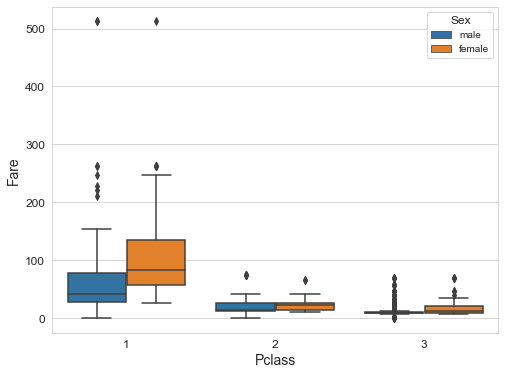

In [27]:
# Distribution of Pclass based Fare for the training data
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Fare', data=train, hue='Sex');

# Why is the median Fare for Females higher?

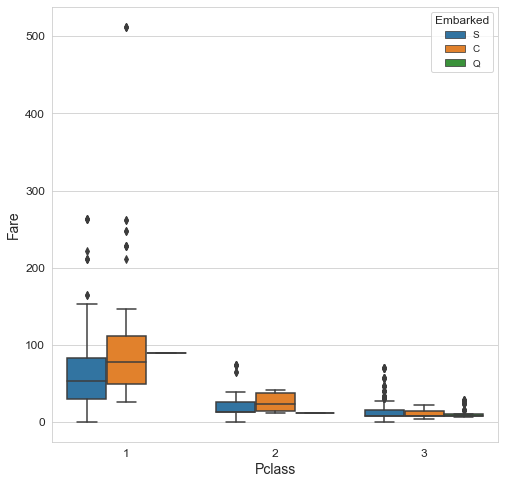

In [28]:
# Distribution of Pclass based Fare for the training data
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
sns.boxplot(x='Pclass', y='Fare', data=train, hue='Embarked');

# Why is the median Fare for Females higher?

In [29]:
for cl in [1, 2, 3]:
    print(cl, 'st Class', train[train['Pclass'] == cl]['Fare'].median())
    
# We use median here since mean would give a bad estimate for the missing 
# fares since outliers are present in the fares, and mean gets affected by
# extreme values whereas median doesn't get that affected by the extreme values

1 st Class 60.287499999999994
2 st Class 14.25
3 st Class 8.05


In [11]:
def impute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):
        
        if Pclass == 1:
            return 60.29
        elif Pclass == 2:
            return 14.25
        else:
            return 8.05
    else:
        return Fare       

In [12]:
test['Fare'] = test[['Fare', 'Pclass']].apply(impute_fare, axis=1)

In [13]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

All missing values from the train and test data sets have been removed.

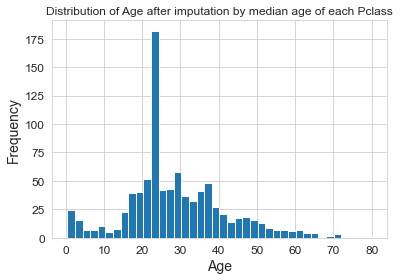

In [33]:
# Distribution of ages
train['Age'].plot.hist(bins=40)
plt.title('Distribution of Age after imputation by median age of each Pclass')
plt.xlabel('Age');

Imputing missing Age values by the median age per class has clearly altered the distribution of ages in the train data set

### CONTINUING EDA

In [34]:
sns.set_style('whitegrid')

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

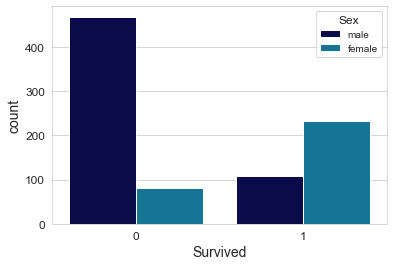

In [35]:
# Countplot of Passengers who Survived and those who didn't based on Gender

sns.countplot(x='Survived', data=train, hue='Sex', palette='ocean');

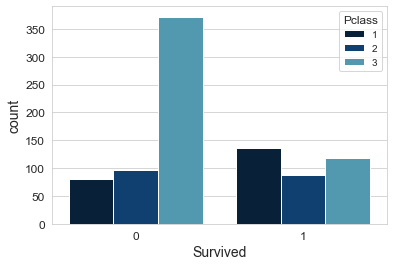

In [36]:
# Countplot of passengers who Survived or didn't based on Pclass

sns.countplot(x='Survived', data=train, hue='Pclass', palette='ocean');

In [37]:
# Percentage of survivors for each class
Sur_Pclass_list = [] 
for i in [1, 2, 3]:
    Sur_Pclass = len(train[(train['Pclass'] == i) & (train['Survived'] == 1)]) / len(train[train['Pclass'] == i]) * 100
    Sur_Pclass_list.append(Sur_Pclass)
    print('Percentage of Survivors in', i, 'Class is : ', Sur_Pclass)

Percentage of Survivors in 1 Class is :  62.96296296296296
Percentage of Survivors in 2 Class is :  47.28260869565217
Percentage of Survivors in 3 Class is :  24.236252545824847


In [38]:
Sur_Pclass_list_df = pd.DataFrame(Sur_Pclass_list, index=['Pclass 1', 'Pclass 2', 'Pclass 3'])
Sur_Pclass_list_df.columns = ['% Survival']
Sur_Pclass_list_df

,% Survival
Pclass 1,62.962963
Pclass 2,47.282609
Pclass 3,24.236253


OBSERVATION :

The maximum passengers belonged to the age category 20 to 32


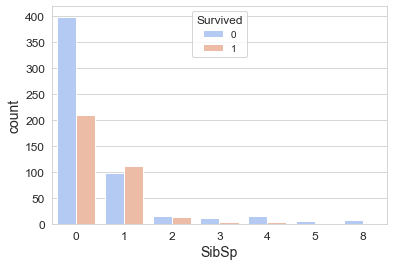

In [39]:
# Countplot of SibSp
sns.countplot(x='SibSp', data=train, hue='Survived', palette='coolwarm');

The passengers accompanied by more Siblings or Spouses are less likely to survive. 

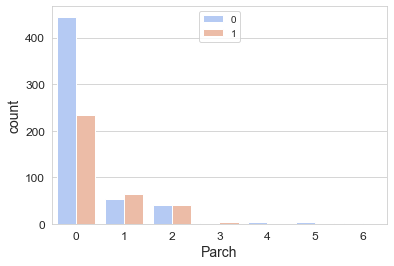

In [40]:
sns.countplot(x='Parch', data=train, hue='Survived', palette='coolwarm')
plt.legend(loc='upper center');

Which shows 
 - although the people travelling alone and survived are more in number than all other categories but the highest number of lives lost also belong to this category so it is clear that the male passengers not having any family members onboard were pushed at the back in the queues getting to the lifeboats.   
 - The passengers travelling with only one parent or child are slighly more likely to survive as they need to accompany the people who cannot provide for themselves. 

From the above two plots we can Infer that most of the passengers were alone on board

### CORRELATION ATRIX

In [41]:
cor = train.corr()
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035840,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500
Age,0.035840,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784
SibSp,-0.057527,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000


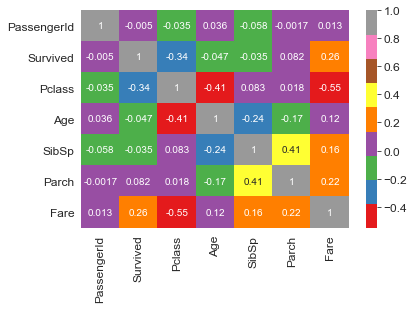

In [42]:
sns.heatmap(cor, cmap='Set1', annot=True);

Inerpretation :

 - Weak Negative correlation between Pclass and Survival
 - Weak Positive correlation between Fare and Survival
 - Weak Negative correlation between Pclass and Fare, which is obvious since as Pclass goes from 1 to 3 the Fare decreases
 - Moderate Negative correlation between Pclass and Fare
 - Weak Negative correlation between Age and the number of siblings and/or spouses aboard
 - Moderate Positive correlation between SibSp and Parch

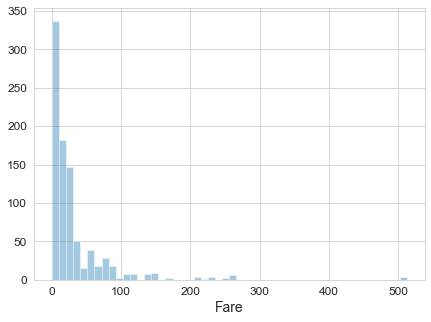

In [43]:
# Distribution of how much people paid
fig = plt.figure(figsize=(7,5))
sns.distplot(train['Fare'], kde=False);

Which shows that most of the people were travelling in the 3rd Class

In [44]:
len(train[train['Fare'] == 0])

15

15 Passengers from the 3rd class were traveling without any ticket 

## DEALING WITH CATEGORICAL VARIABLES
CONVERT Sex AND Embarked TO DUMMY VARIABLES

In [45]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [14]:
def cat_type(df):
    col = df.columns
    
    for i in col:
        if df[i].nunique() <= 8:
            df[i] = df[i].astype('category')
            
cat_type(train)
cat_type(test)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(6), float64(2), int64(1), object(2)
memory usage: 34.0+ KB


In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    category
 6   Parch        418 non-null    category
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    float64 
 9   Embarked     418 non-null    category
dtypes: category(5), float64(2), int64(1), object(2)
memory usage: 16.0+ KB


## DETERMINE OUTLIERS IN A DATASET

In [15]:
def outlier(df,columns):
    for i in columns:
        quartile_1,quartile_3 = np.percentile(df[i],[25,75])
        quartile_f,quartile_l = np.percentile(df[i],[1,99])
        IQR = quartile_3 - quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(i, lower_bound, upper_bound, quartile_f, quartile_l)
                
        df[i].loc[df[i] < lower_bound] = quartile_f
        df[i].loc[df[i] > upper_bound] = quartile_l
num_col = ['Fare','Age']       


outlier(train, num_col)
outlier(test, num_col)

Fare -26.724 65.6344 0.0 249.00622000000033
Age -0.5 59.5 1.0 65.0
Fare -27.468312499999996 66.8359875 6.447411 262.375
Age 2.9375 56.4375 0.9336 63.829999999999984


c:\users\mishita\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


## ONE HOT ENCODING

In [16]:
def OHE(df1,df2):
    #cat_col = column

    len_df1 = df1.shape[0]
    
    df = pd.concat([df1,df2],ignore_index=True)
    cat_col = df1.select_dtypes(include =['category']).columns
    c2,c3 = [],{}
    
    print('No. of Categorical features',len(cat_col))
    for c in cat_col:
        if df[c].nunique()>2 :
            c2.append(c)
            c3[c] = 'ohe_'+c
    
    df = pd.get_dummies(df, prefix=c3, columns=c2,drop_first=True)

    df1 = df.loc[:len_df1-1]
    df2 = df.loc[len_df1:]
    print('Train',df1.shape)
    print('Test',df2.shape)
    return df1,df2

In [17]:
train1, test1 = OHE(train, test)

No. of Categorical features 6
Train (891, 24)
Test (418, 24)


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

train1['Sex'] = le.fit_transform(train1['Sex'])
test1['Sex'] = le.fit_transform(test1['Sex'])

In [54]:
train1.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,1,0,0,0,1
Age,22,38,26,35,35
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,249.006,7.925,53.1,8.05
ohe_Pclass_2,0,0,0,0,0
ohe_Pclass_3,1,0,1,0,1
ohe_SibSp_1,1,1,0,1,0


In [57]:
test1.head().T

,891,892,893,894,895
PassengerId,892,893,894,895,896
Survived,NaN,NaN,NaN,NaN,NaN
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,1,0,1,1,0
Age,34.5,47,63.83,27,22
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7,9.6875,8.6625,12.2875
ohe_Pclass_2,0,0,1,0,0
ohe_Pclass_3,1,1,0,1,1
ohe_SibSp_1,0,1,0,0,1


In [20]:
from sklearn.preprocessing import StandardScaler
# scale the train ages

scaler_age = StandardScaler()
train1['Age_s'] = scaler_age.fit_transform(train1['Age'].values.reshape(-1,1))

In [46]:
print(train1['Age_s'].mean(), train1['Age_s'].std())

5.582266161976096e-17 1.0005616400330457


In [22]:
scaler_age.mean_

array([29.06360269])

In [23]:
scaler_age.var_

array([174.28592608])

In [24]:
scaler_age.scale_

array([13.20173951])

In [30]:
13.20173951 ** 2

174.285926089895

In [31]:
test1['Age_s'] = (test1['Age'] - 29.06360269) / 13.20173951

In [26]:
scaler_fare = StandardScaler()
train1['Fare_s'] = scaler_fare.fit_transform(train1['Fare'].values.reshape(-1,1))

In [47]:
print(train1['Fare_s'].mean(), train1['Fare_s'].std())

1.5949331891360275e-17 1.0005616400330457


In [27]:
scaler_fare.mean_

array([47.92013672])

In [28]:
scaler_fare.var_

array([6212.45312203])

In [29]:
scaler_fare.scale_

array([78.81911648])

In [32]:
(78.81911648)**2

6212.453122687808

In [33]:
test1['Fare_s'] = (test1['Fare'] - 47.92013672) / 78.81911648

In [34]:
train1.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,1,0,0,0,1
Age,22,38,26,35,35
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,249.006,7.925,53.1,8.05
ohe_Pclass_2,0,0,0,0,0
ohe_Pclass_3,1,0,1,0,1
ohe_SibSp_1,1,1,0,1,0


In [35]:
test1.head().T

,891,892,893,894,895
PassengerId,892,893,894,895,896
Survived,NaN,NaN,NaN,NaN,NaN
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,1,0,1,1,0
Age,34.5,47,63.83,27,22
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7,9.6875,8.6625,12.2875
ohe_Pclass_2,0,0,1,0,0
ohe_Pclass_3,1,1,0,1,1
ohe_SibSp_1,0,1,0,0,1


In [36]:
train1.drop(['PassengerId', 'Name', 'Age', 'Fare', 'Ticket'], axis=1, inplace=True)

In [37]:
test1.drop(['PassengerId', 'Name', 'Age', 'Fare', 'Ticket'], axis=1, inplace=True)

In [38]:
train1.head().T

,0,1,2,3,4
Survived,0,1,1,1,0
Sex,1,0,0,0,1
ohe_Pclass_2,0,0,0,0,0
ohe_Pclass_3,1,0,1,0,1
ohe_SibSp_1,1,1,0,1,0
ohe_SibSp_2,0,0,0,0,0
ohe_SibSp_3,0,0,0,0,0
ohe_SibSp_4,0,0,0,0,0
ohe_SibSp_5,0,0,0,0,0
ohe_SibSp_8,0,0,0,0,0


In [39]:
test1.head().T

,891,892,893,894,895
Survived,NaN,NaN,NaN,NaN,NaN
Sex,1,0,1,1,0
ohe_Pclass_2,0,0,1,0,0
ohe_Pclass_3,1,1,0,1,1
ohe_SibSp_1,0,1,0,0,1
ohe_SibSp_2,0,0,0,0,0
ohe_SibSp_3,0,0,0,0,0
ohe_SibSp_4,0,0,0,0,0
ohe_SibSp_5,0,0,0,0,0
ohe_SibSp_8,0,0,0,0,0


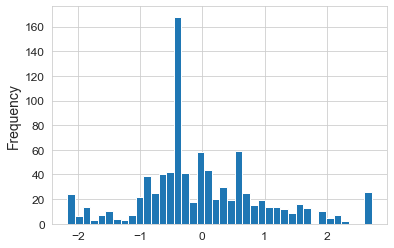

In [40]:
# Distribution after standardization of the Age feature doesn't change 
# much except shifting to the left beyond 0 mark
sns.set_style('whitegrid')
train1['Age_s'].plot.hist(bins=40);

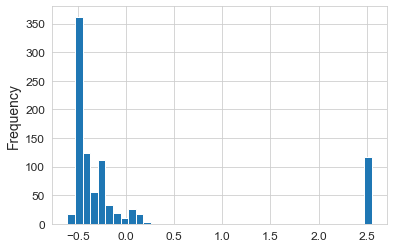

In [41]:
# Distribution after standardization of the Fare feature doesn't change 
# much except shifting to the left beyond 0 mark
train1['Fare_s'].plot.hist(bins=40);

Standardizing a variable i.e. shifting and scaling its distribution to have mean 0 and variance 1

## TRAIN TEST SPLIT

In [42]:
X = train1.drop('Survived', axis=1)
y = train1['Survived'].copy().astype('category')

In [43]:
from sklearn.linear_model import LogisticRegression

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

In [59]:
logmodel = LogisticRegression()

In [61]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## MAKING PREDICTIONS

In [62]:
predictions = logmodel.predict(X_test)

## MODEL EVALUATION
### HOLD OUT METHOD

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
print(confusion_matrix(y_test, predictions))

[[140  17]
 [ 33  78]]


In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.82      0.70      0.76       111

    accuracy                           0.81       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



## INTERPRETATION : 

### precision
Precision is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives. Said another way, **“for all instances classified positive, what percent was correct?”**

- Thus, of all the instances corresponding to Survived = 0, i.e. Deceased, 82 % were classified to have lost their lives correctly.
- And 80 % of all instances corresponding to Survived = 1 were classified correctly. 

### recall
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, **“for all instances that were actually positive, what percent was classified correctly?”**

 - Out of all the passengers that had actually lost their lives in the early morning hours of April 15th, 1912, 87 % were correctly classified. And out of those who actually had survived that unfateful event 73 % were correctly classified.

### f1 score
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

- Fron its range of 0 to 1, 0.82 and 0.76 are good scores. But it is clearly mentioned that f1-score is used to compare between modes and not for global comparisons so we'll use it when we use a different sampling procedure or a different model.


### support
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

- This we will use when we run other sampling techniques and training models on our training data. Since there are (46) more observations in our present training data, we could consider going for Stratified Sampling.
 




## CONCLUSION :

- We obtain very good results from this method of holding out a part of the training data set. 


But we consider going for cross-validation.

### K- FOLD CROSS VALIDATION
Because in the holdout method it isn't certain which data points will end up in the validation set and the result might be entirely different for different sets.

What we require is a method that provides ample data for training the model and also leaves ample data for validation. K Fold cross validation does exactly that.

https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f

In thi smethod the train data set is split into k sets using Stratified Kfold Sampling. Each split model is created and predicted using that model. The final predicted values is the average of all models. 

In [67]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [68]:
len(train['Survived'])

891

We do need Stratified Sampling as the percentage of passengers who lost their lives is approximately 1.61 times greater that those were rescued.(shown below)

So instead we go for Stratified Sampling then K-Fold Crass Validation 

In [69]:
# 0:1
549/342

1.605263157894737

In [72]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [73]:
#Grid Search
logreg = LogisticRegression(class_weight='balanced')
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]}
clf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=10)
clf.fit(X,y)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

c:\users\mishita\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Best roc_auc: 0.8528, with best C: {'C': 2}


In [71]:
from sklearn.model_selection import StratifiedKFold

In [100]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_score = []
i = 1

for train_index, test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    
    # model
    lr = LogisticRegression(C=2)
    lr.fit(xtr, ytr)
    score = roc_auc_score(yvl, lr.predict(xvl))
    print('ROC AUC Score : ', score)
    cv_score.append(score)
    pred_test = 

1 of KFold 5
ROC AUC Score :  0.7777997364953887
1 of KFold 5
ROC AUC Score :  0.7774064171122994
1 of KFold 5
ROC AUC Score :  0.7763368983957218
1 of KFold 5
ROC AUC Score :  0.787566844919786
1 of KFold 5
ROC AUC Score :  0.8080042547533572


In [101]:
print('confusion_matrix', confusion_matrix(yvl, lr.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

confusion_matrix [[94 15]
 [17 52]]
Cv [0.7777997364953887, 0.7774064171122994, 0.7763368983957218, 0.787566844919786, 0.8080042547533572] 
Mean cv Score 0.7854228303353107


In [102]:
lr.coef_

array([[-2.41443379, -1.18991374, -2.26966177,  0.22112575, -0.21792424,
        -1.22295248, -1.33915629, -1.06977143, -1.1654288 ,  0.34478822,
        -0.13662661,  0.16174574, -1.08651319, -1.22433749, -0.5760934 ,
         0.        , -0.05302654, -0.46342013, -0.54448287, -0.01768796]])